In This code we use both Supervised and Unsupervised Deep Learning

Here we use the credit car datset to find the fraud detection

## Part 1

In [30]:
!pip install tensorflow

Importing the datset

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [86]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# print(y)

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc.fit_transform(X)
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [34]:
!pip install minisom

from minisom import MiniSom
som = MiniSom(x=10,y=10, input_len=15, sigma = 1.0, learning_rate= 0.5)

som.random_weights_init(X)
som.train_random(data= X, num_iteration = 100)

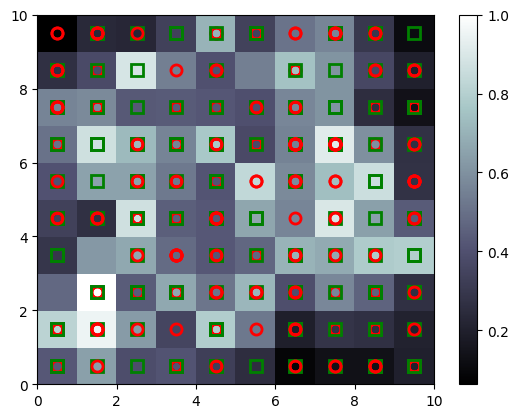

In [35]:
from pylab import bone, pcolor, colorbar, plot, show
bone() # Bonne simply create a while screen
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']  # o - circle , s - square
colors = ['r', 'g']  # red and green

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize =8,
       markeredgewidth = 2)
show()

In [52]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,2)], mappings[(7,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(len(frauds))
# print(frauds[1])

23
[7.36456162e+06 4.34128832e+01 1.61805413e+02 2.03526109e+00
 1.47336533e+01 1.26562410e+01 1.55997557e+01 6.48053908e-01
 4.27536232e-01 2.40000000e+00 4.57971014e-01 1.92898551e+00
 5.28083443e+02 1.97942219e+06 9.99827000e+02]


In [56]:
lst = []
for i in frauds[:, 0]:
  lst.append(int(i))
print(lst)

[7364638, 7364561, 7364481, 7364443, 7291810, 7292130, 7291454, 7291498, 7291676, 7292028, 7291170, 7293032, 7292726, 7291171, 7291057, 7291552, 7292666, 7292769, 7292104, 7291997, 7292896, 7291604, 7292948]


## Part 2

Going from Unsupervised to Supervised Deep Learning

Creating the matrix of features

In [51]:
customers = dataset.iloc[:, 1:].values
print(customers[1])

[  0.     22.67    7.      2.      8.      4.      0.165   0.      0.
   0.      0.      2.    160.      1.      0.   ]


Creating the dependent variables

In [61]:
is_fraud = np.zeros(len(dataset)) # It initially creates the vector of zeros
for i in range(len(dataset)):
  # print(dataset.iloc[i, 0])
  if dataset.iloc[i, 0] in lst:
    print("Hello")

    is_fraud[i] = 1
# print(is_fraud)
# print(frauds)

In [72]:
from keras.layers import Dense
from keras.models import Sequential

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

customers = sc.fit_transform(customers)

In [74]:
ann = tf.keras.models.Sequential()

In [75]:
ann.add(tf.keras.layers.Dense(units = 6, kernel_initializer= 'uniform',activation = 'relu', input_dim = 15))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
ann.add(tf.keras.layers.Dense(units = 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

In [77]:
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [78]:
ann.fit(customers, is_fraud, batch_size= 1, epochs = 3)

Epoch 1/3
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9727 - loss: 0.5140
Epoch 2/3
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0344
Epoch 3/3
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0072


Predictig the probability of frauds

In [85]:
y_pred = ann.predict(customers)
# y_pred
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

y_pred[2]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([1.56548590e+07, 2.58065033e-04])